In [7]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [37]:
display(AnalyticBS(20, 0.1, 0.1, 0.4, 10.0))

10.09950166660349

In [36]:
def AnalyticBS(S, t, r, sigma, K):
    return S*norm.cdf((-np.log(K) + np.log(S) + (r + .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5))) - K*np.exp(-r*t)*norm.cdf((-np.log(K) + np.log(S) + (r - .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5)))

In [4]:
V1 = np.loadtxt('V1.dat', dtype=None)

In [71]:
Vt = [[AnalyticBS(j/199.0*30.0, i/2000.0*0.25, 0.1, 0.4, 10.0) for i in range(2000)] for j in range(199)]

<ipython-input-36-546e362481e1>:2: RuntimeWarning: divide by zero encountered in log
  return S*norm.cdf((-np.log(K) + np.log(S) + (r + .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5))) - K*np.exp(-r*t)*norm.cdf((-np.log(K) + np.log(S) + (r - .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5)))
<ipython-input-36-546e362481e1>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return S*norm.cdf((-np.log(K) + np.log(S) + (r + .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5))) - K*np.exp(-r*t)*norm.cdf((-np.log(K) + np.log(S) + (r - .5*np.power(sigma, 2))*t)/(sigma*np.power(t, .5)))


In [72]:
Vta = np.transpose(np.array([np.array(row) for row in Vt]))
np.shape(Vta)==np.shape(V1)

True

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

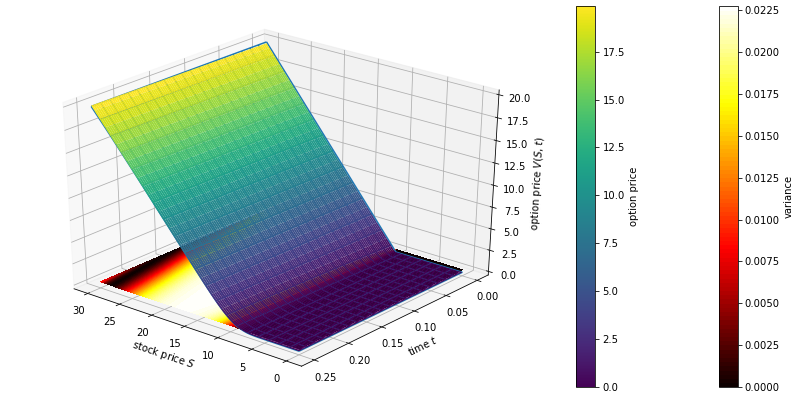

In [183]:
%matplotlib widget
t1 = np.linspace(0,0.25,2000)
s1 = np.linspace(0,30.0,199)
(S1, T1) = np.meshgrid(s1, t1)
fig1 = plt.figure(figsize=(15, 7))
ax1 = fig1.gca(projection='3d')
ax1.set_xlabel('stock price $S$')
ax1.set_ylabel('time $t$')
ax1.set_zlabel('option price $V(S,t)$')
surf1 = ax1.plot_wireframe(S1, T1, V1, rstride=100, cstride=10, label='Numerical')
surf2 = ax1.plot_surface(S1, T1, Vta, rstride=20, cstride=5, cmap='viridis', label='Analytical')
errcm1 = ax1.contourf(S1, T1, Vsd, 100, zdir='z', cmap='hot', offset=.3)
ax1.view_init(elev=30, azim=130)
surf2._facecolors2d=surf._facecolors3d
surf2._edgecolors2d=surf._edgecolors3d
plt.colorbar(errcm1, label='variance')
plt.colorbar(surf2, label='option price')
plt.show()

nel caso di 200x2000 ci ha impiegato 0.23s a eseguire

nel caso di 2000x41000 ci ha impiegato 23.56s a eseguire

0.11244132945545891

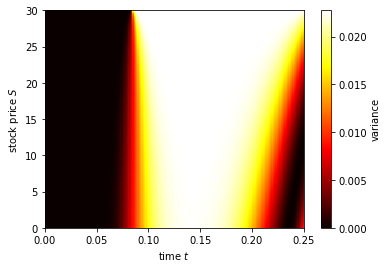

In [177]:
%matplotlib inline
np.size(np.mean(V1-Vta, axis=0))
np.size(np.mean(V1-Vta, axis=1))
display(np.sqrt(sum(sum(np.power(V1-Vta, 2)))/np.size(V1)))
Vsd = np.power(V1-Vta, 2)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('time $t$')
ax2.set_ylabel('stock price $S$')
errcm = ax2.imshow(Vsd, aspect=.007, cmap='hot', interpolation='nearest', extent=[0, 0.25, 0, 30.0])
plt.colorbar(errcm, label='variance')
plt.show()

In [184]:
fig1.savefig('fig1.pdf', bbox_inches='tight')
fig2.savefig('fig2.pdf')

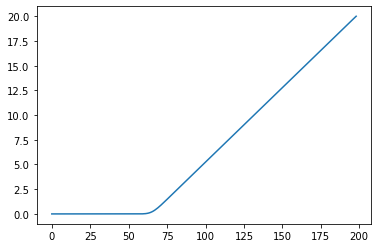

In [219]:
%matplotlib inline
np.shape(V1)
V1[:,150]
plt.plot(V1[150, :])